In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
raw19 = 'https://raw.githubusercontent.com/julihdez36/Predictive-maintenance/refs/heads/main/Data/Dataset_Year_2019.csv'
df19 = pd.read_csv(raw19)

raw20 = 'https://raw.githubusercontent.com/julihdez36/Predictive-maintenance/refs/heads/main/Data/Dataset_Year_2020.csv'
df20 = pd.read_csv(raw20)

In [24]:
new_names = ['location', 'power', 'self_protection', 
 'avg_earth_ddt', 'max_earth_ddt', 
 'burning_rate', 'criticality_ceramics', 
 'removable_connectors', 'client_type', 
 'num_users', 'eens_kwh', 
 'installation_type', 'air_network', 
 'circuit_queue', 'network_km_lt', 
 'burned_transformers']

df19.columns, df20.columns = new_names, new_names

df19['year'] = 2019
df20['year']= 2020

df19.shape, df20.shape

((15873, 17), (15873, 17))

In [26]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              15873 non-null  int64  
 1   power                 15873 non-null  float64
 2   self_protection       15873 non-null  int64  
 3   avg_earth_ddt         15873 non-null  float64
 4   max_earth_ddt         15873 non-null  float64
 5   burning_rate          15873 non-null  float64
 6   criticality_ceramics  15873 non-null  int64  
 7   removable_connectors  15873 non-null  int64  
 8   client_type           15873 non-null  object 
 9   num_users             15873 non-null  int64  
 10  eens_kwh              15873 non-null  float64
 11  installation_type     15873 non-null  object 
 12  air_network           15873 non-null  int64  
 13  circuit_queue         15873 non-null  int64  
 14  network_km_lt         15873 non-null  object 
 15  burned_transformers

In [29]:
df19.burned_transformers.sum(), df20.burned_transformers.sum()

(807, 629)

In [31]:
df = pd.concat([df19,df20], ignore_index= True)
print(df.shape)
df.sample(3)

(31746, 17)


,location,power,self_protection,avg_earth_ddt,max_earth_ddt,burning_rate,criticality_ceramics,removable_connectors,client_type,num_users,eens_kwh,installation_type,air_network,circuit_queue,network_km_lt,burned_transformers,year
22964,0,15.0,0,1.268421,3.2,0.0,1,0,STRATUM 1,7,280.8,POLE,1,1,0.91559,0,2020
864,1,112.5,0,3.155602,6.6,0.0,0,1,STRATUM 3,115,1822.5,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.4104,0,2019
24798,0,25.0,0,4.148532,8.3,0.0,0,0,STRATUM 1,36,750.6,POLE,1,1,138108.0,0,2020


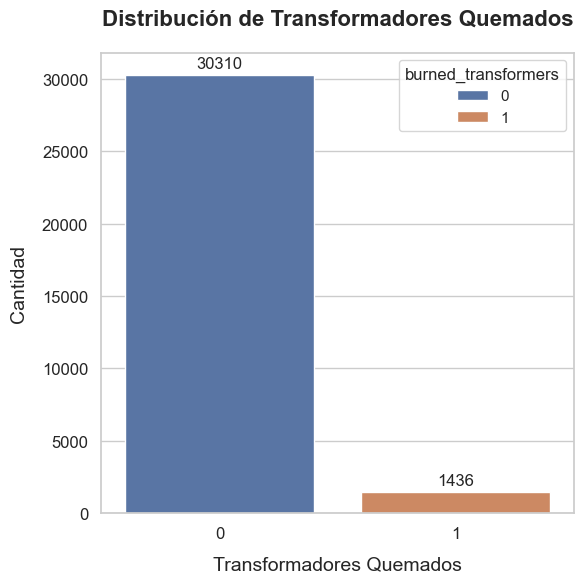

In [45]:
# Configurar estilo general de Seaborn
sns.set_theme(style="whitegrid")  # Cambia a 'darkgrid', 'white', 'dark', etc., según prefieras.

# Crear el gráfico
plt.figure(figsize=(6, 6))  # Ajustar el tamaño de la figura
ax = sns.countplot(data=df, x='burned_transformers', hue = 'burned_transformers')  # Cambia la paleta según el estilo deseado

# Etiquetas en el eje x e y
ax.set_xlabel('Transformadores Quemados', fontsize=14, labelpad=10)
ax.set_ylabel('Cantidad', fontsize=14, labelpad=10)

# Título
ax.set_title('Distribución de Transformadores Quemados', fontsize=16, fontweight='bold', pad=20)

# Añadir etiquetas de conteo sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Ajustar las etiquetas del eje x si son muy largas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar espacio del gráfico para que el título no quede pegado
plt.tight_layout()

# Mostrar el gráfico
plt.show()
